# Playground for Advanced Topics Slides - FE

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2021-11-11 14:12:52.172305


In [2]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# disable chained assignments
pd.options.mode.chained_assignment = None 

# Load Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/stepthom/869_course/main/data/GermanCredit.csv')
df['Class'] = df['Class'].map({'Good': 1, 'Bad': 0})
df['Salary'] = df['Amount']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Duration                                1000 non-null   int64
 1   Amount                                  1000 non-null   int64
 2   InstallmentRatePercentage               1000 non-null   int64
 3   ResidenceDuration                       1000 non-null   int64
 4   Age                                     1000 non-null   int64
 5   NumberExistingCredits                   1000 non-null   int64
 6   NumberPeopleMaintenance                 1000 non-null   int64
 7   Telephone                               1000 non-null   int64
 8   ForeignWorker                           1000 non-null   int64
 9   Class                                   1000 non-null   int64
 10  CheckingAccountStatus.lt.0              1000 non-null   int64
 11  CheckingAccountSta

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified,Salary
0,6,1169,4,4,67,2,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1169
1,48,5951,2,2,22,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,5951
2,12,2096,2,3,49,1,2,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,2096
3,42,7882,2,4,45,1,2,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,7882
4,24,4870,3,4,53,2,2,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,4870


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering

## Feature Scaling

In [6]:
# Helper function to make a nice-looking histogram

def plot_hist(feature, title):
    plt.figure(figsize=(8, 5));
    plt.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    plt.title(title, fontsize=20);
    #ax.tick_params(axis='both', which='major', labelsize=18);
    plt.grid(True);

In [7]:
X_train[['Salary']].head(10)

,Salary
29,6836
535,2319
695,1236
557,5003
836,886
596,1442
165,2978
918,2359
495,2996
824,3780


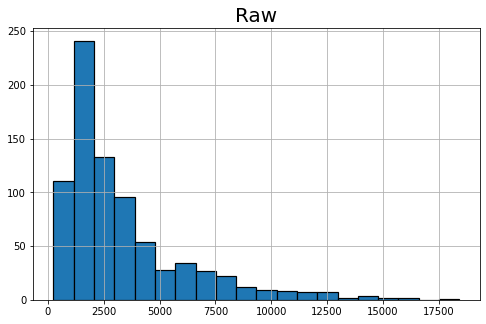

In [8]:
plot_hist(X_train['Salary'], "Raw");

## Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Salary']])

X_train['Salary_Std'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_Std'] = scaler.transform(X_test[['Salary']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train[['Salary_Std']].head(10)

,Salary_Std
29,1.199912
535,-0.359630
695,-0.733547
557,0.567050
836,-0.854388
596,-0.662423
165,-0.132103
918,-0.345819
495,-0.125888
824,0.144796


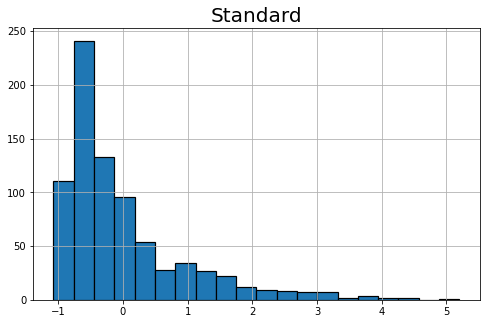

In [11]:
plot_hist(X_train['Salary_Std'], "Standard");

## MinMax

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[['Salary']])

X_train['Salary_MinMax'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_MinMax'] = scaler.transform(X_test[['Salary']])   

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
X_train[['Salary_MinMax']].head(10)

,Salary_MinMax
29,0.362386
535,0.113844
695,0.054253
557,0.261527
836,0.034995
596,0.065588
165,0.150105
918,0.116045
495,0.151095
824,0.194234


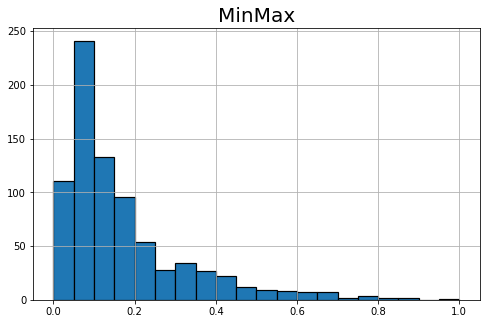

In [14]:
plot_hist(X_train['Salary_MinMax'], "MinMax");

## Log

In [15]:
from sklearn.preprocessing import FunctionTransformer

scaler = FunctionTransformer(np.log1p, validate=True)
scaler.fit(X_train[['Salary']])
X_train['Salary_Log'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_Log'] = scaler.transform(X_test[['Salary']]) 

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                    kw_args=None, validate=True)

In [16]:
X_train[['Salary_Log']].head(10)

,Salary_Log
29,8.830104
535,7.749322
695,7.120444
557,8.517993
836,6.787845
596,7.274480
165,7.999343
918,7.766417
495,8.005367
824,8.237744


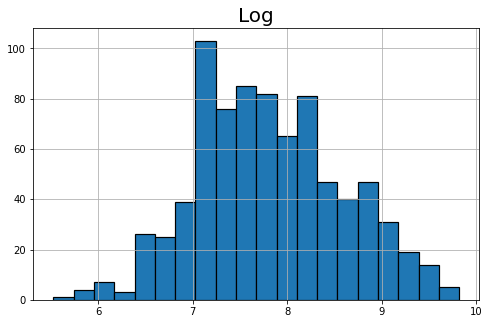

In [17]:
plot_hist(X_train['Salary_Log'], "Log");

## Box-Cox

In [18]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='box-cox')
scaler.fit(X_train[['Salary']])
X_train['Salary_BoxCox'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_BoxCox'] = scaler.transform(X_test[['Salary']]) 

PowerTransformer(copy=True, method='box-cox', standardize=True)

In [19]:
X_train[['Salary_BoxCox']].head(10)

,Salary_BoxCox
29,1.291730
535,-0.054503
695,-0.893962
557,0.914991
836,-1.355653
596,-0.684355
165,0.267494
918,-0.032279
495,0.275172
824,0.568502


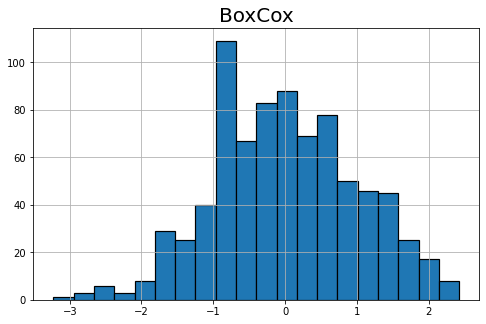

In [20]:
plot_hist(X_train['Salary_BoxCox'], "BoxCox");

## Yeo-Johnson

In [21]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
scaler.fit(X_train[['Salary']])
X_train['Salary_YeoJohnson'] = scaler.transform(X_train[['Salary']])  

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [22]:
X_train[['Salary_YeoJohnson']].head(10)

,Salary_YeoJohnson
29,1.291774
535,-0.054483
695,-0.894055
557,0.915073
836,-1.355755
596,-0.684425
165,0.267553
918,-0.032256
495,0.275232
824,0.568584


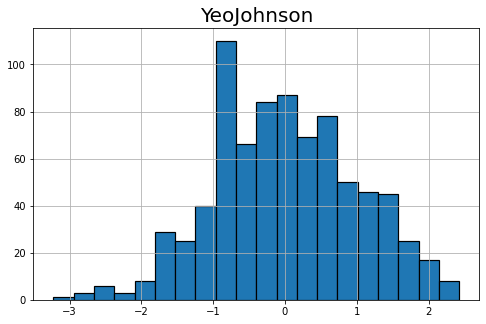

In [23]:
plot_hist(X_train['Salary_YeoJohnson'], "YeoJohnson");

## Binning

In [24]:
# TODO

# Categorical Features

In [36]:
df2 = pd.DataFrame(data={'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                         'Age': [23, 21, 45, 34, 32, 30, 37, 55, 32, 19],
                         'Province': ['ON', 'QB', 'AB', 'ON', 'ON', 'BC', 'BC', 'QB', 'AB', 'ON'],
                         'School': ['Queens', 'Western', 'Yale', 'Queens', 'Yale', 'Queens', 'Queens', 'Yale',  'Western',  'Western'],
                         'Income': ['Low', 'Low', 'Medium', 'Low', 'Medium', 'High', 'High', 'Low', 'Medium', 'Low'],
                         'Default': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']
                         })

df2

,ID,Age,Province,School,Income,Default
0,1,23,ON,Queens,Low,No
1,2,21,QB,Western,Low,Yes
2,3,45,AB,Yale,Medium,No
3,4,34,ON,Queens,Low,Yes
4,5,32,ON,Yale,Medium,No
5,6,30,BC,Queens,High,Yes
6,7,37,BC,Queens,High,No
7,8,55,QB,Yale,Low,No
8,9,32,AB,Western,Medium,Yes
9,10,19,ON,Western,Low,No


In [53]:
from sklearn.model_selection import train_test_split

X = df2.drop(['Default'], axis=1)
y = df2[['Default']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

In [54]:
X_train

,ID,Age,Province,School,Income
5,6,30,BC,Queens,High
1,2,21,QB,Western,Low
7,8,55,QB,Yale,Low
0,1,23,ON,Queens,Low
4,5,32,ON,Yale,Medium


In [55]:
X_test

,ID,Age,Province,School,Income
3,4,34,ON,Queens,Low
9,10,19,ON,Western,Low
6,7,37,BC,Queens,High
8,9,32,AB,Western,Medium
2,3,45,AB,Yale,Medium


## One Hot Encoding

In [46]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(X_train[['Province']])

enc.transform(X_train[['Province']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [47]:
enc.transform(X_test[['Province']])

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.]])

## Contrasts

In [26]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X[['Class']]
X = X.drop(['Class'], axis=1)

y['Class'] = y['Class'].map({'Good': 1, 'Bad': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

(800, 62)

(200, 62)

# Aggregations

In [28]:
pip install featuretools

     |████████████████████████████████| 329 kB 4.2 MB/s 
     |████████████████████████████████| 1.0 MB 43.6 MB/s 
     |████████████████████████████████| 147 kB 48.8 MB/s 
     |████████████████████████████████| 296 kB 54.6 MB/s 
     |████████████████████████████████| 11.3 MB 26.2 MB/s 
     |████████████████████████████████| 793 kB 64.8 MB/s 
     |████████████████████████████████| 596 kB 53.6 MB/s 
     |████████████████████████████████| 132 kB 56.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: pandas
    Found existing installation:

In [27]:
import featuretools as ft

# Let's load a different kind of dataset - one that has lots of transactions

es = ft.demo.load_mock_customer(return_entityset=True)
es

ModuleNotFoundError: ignored

In [ ]:
es["transactions"].df.head(30)

In [ ]:
feature_matrix, features = ft.dfs(entityset=es,
                                   target_entity="customers",
                                   verbose=True)
feature_matrix

In [ ]:
list(feature_matrix)

In [ ]:
ft.list_primitives() 